<a href="https://colab.research.google.com/github/natkins14/FastF1-F1-Data-Analytics/blob/main/Draw_a_Track_Map_with_Numbered_Corners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fastf1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import fastf1

Silverstone Track Map

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_

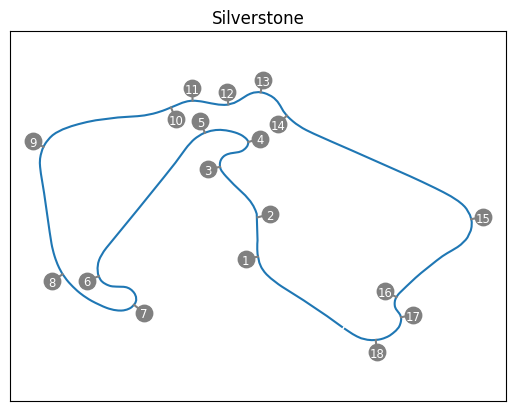

In [ ]:
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()

def rotate(xy, *, angle):
  rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                     [-np.sin(angle), np.cos(angle)]])
  return np.matmul(xy, rot_mat)

# get an array of shape [n, 2] where n is the number of points an the second
# axis is x and y.

track = pos.loc[:, ('X', 'Y')].to_numpy()

# convert the rotation angle from degrees to radian

track_angle = circuit_info.rotation / 180 * np.pi

# rotate and plot the track map
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

offset_vector = [500, 0] # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.

for _, corner in circuit_info.corners.iterrows():
  # create a string from corner number and letter
  txt = f"{corner['Number']}{corner['Letter']}"

  # convert the angle from degrees to radians
  offset_angle = corner['Angle'] / 180 *np.pi

  # Rotate the offset vector so that it points sideways from the track
  offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

  # Add the offset to the position of the corner
  text_x = corner['X'] + offset_x
  text_y = corner['Y'] + offset_y

  # Rotate the text position equivalently to the rest of the track map
  text_x, text_y = rotate([text_x, text_y], angle=track_angle)

  # Rotate the center of the corner equivalently to the rest of the track map
  track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

  # Draw a circle next to the track
  plt.scatter(text_x, text_y, color='grey', s=140)

  # Draw a line from the track to this circle
  plt.plot([track_x, text_x], [track_y, text_y], color='grey')

  # Finally, print the corner number inside the circle.
  plt.text(text_x, text_y, txt,
           va='center_baseline', ha='center', size='small', color='white')

plt.title(session.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

Monaco Track Map

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Monaco Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for sessio

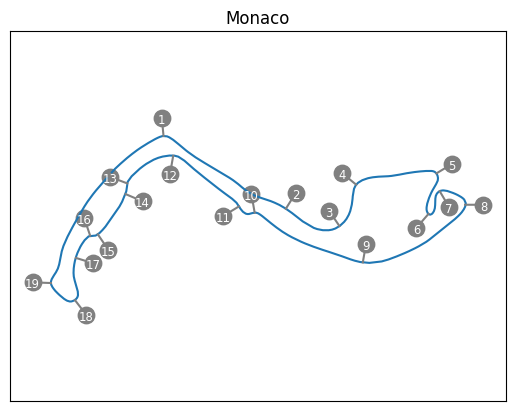

In [ ]:
session = fastf1.get_session(2024, 'Monaco', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()

def rotate(xy, *, angle):
  rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                     [-np.sin(angle), np.cos(angle)]])
  return np.matmul(xy, rot_mat)

# get an array of shape [n, 2] where n is the number of points an the second
# axis is x and y.

track = pos.loc[:, ('X', 'Y')].to_numpy()

# convert the rotation angle from degrees to radian

track_angle = circuit_info.rotation / 180 * np.pi

# rotate and plot the track map
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

offset_vector = [500, 0] # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.

for _, corner in circuit_info.corners.iterrows():
  # create a string from corner number and letter
  txt = f"{corner['Number']}{corner['Letter']}"

  # convert the angle from degrees to radians
  offset_angle = corner['Angle'] / 180 *np.pi

  # Rotate the offset vector so that it points sideways from the track
  offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

  # Add the offset to the position of the corner
  text_x = corner['X'] + offset_x
  text_y = corner['Y'] + offset_y

  # Rotate the text position equivalently to the rest of the track map
  text_x, text_y = rotate([text_x, text_y], angle=track_angle)

  # Rotate the center of the corner equivalently to the rest of the track map
  track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

  # Draw a circle next to the track
  plt.scatter(text_x, text_y, color='grey', s=140)

  # Draw a line from the track to this circle
  plt.plot([track_x, text_x], [track_y, text_y], color='grey')

  # Finally, print the corner number inside the circle.
  plt.text(text_x, text_y, txt,
           va='center_baseline', ha='center', size='small', color='white')

plt.title(session.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

Miami Track Map

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_

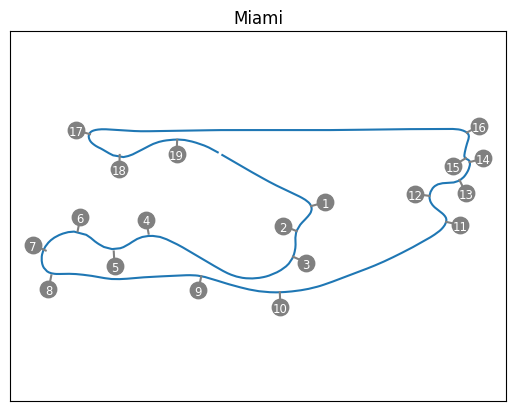

In [ ]:
session = fastf1.get_session(2023, 'Miami', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()

def rotate(xy, *, angle):
  rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                     [-np.sin(angle), np.cos(angle)]])
  return np.matmul(xy, rot_mat)

# get an array of shape [n, 2] where n is the number of points an the second
# axis is x and y.

track = pos.loc[:, ('X', 'Y')].to_numpy()

# convert the rotation angle from degrees to radian

track_angle = circuit_info.rotation / 180 * np.pi

# rotate and plot the track map
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

offset_vector = [500, 0] # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.

for _, corner in circuit_info.corners.iterrows():
  # create a string from corner number and letter
  txt = f"{corner['Number']}{corner['Letter']}"

  # convert the angle from degrees to radians
  offset_angle = corner['Angle'] / 180 *np.pi

  # Rotate the offset vector so that it points sideways from the track
  offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

  # Add the offset to the position of the corner
  text_x = corner['X'] + offset_x
  text_y = corner['Y'] + offset_y

  # Rotate the text position equivalently to the rest of the track map
  text_x, text_y = rotate([text_x, text_y], angle=track_angle)

  # Rotate the center of the corner equivalently to the rest of the track map
  track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

  # Draw a circle next to the track
  plt.scatter(text_x, text_y, color='grey', s=140)

  # Draw a line from the track to this circle
  plt.plot([track_x, text_x], [track_y, text_y], color='grey')

  # Finally, print the corner number inside the circle.
  plt.text(text_x, text_y, txt,
           va='center_baseline', ha='center', size='small', color='white')

plt.title(session.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()